# Ensemble Timeseries comparison

Compare ensemble forecast timeseries

See the extraction section of EnsemblePostProc.ipynb for details on generated this data

In [2]:
from awrams.visualisation import results
from awrams.utils import extents
from awrams.utils import datetools as dt
from awrams.utils import mapping_types as mt
import numpy as np
from matplotlib import pyplot as plt
import os
from awrams.utils.io import data_mapping as dm
import pandas as pd


In [3]:
ENSEMBLE_BASE_PATH = '/data/cwd_awra_data/awra_test_outputs/SydneyWater/'
EXTRACTION_PATH = os.path.join(ENSEMBLE_BASE_PATH,'extractions')

In [9]:
allfcast = os.listdir(EXTRACTION_PATH)
allfcast = [k for k in allfcast if k.startswith('fcast')]

all_ens = ['e'+str(i).zfill(2) for i in range(1,12)]
all_ens

VARS_OF_INTEREST = ['s0','ss','sm','e0','qtot','etot']

In [24]:
def ens_to_percentiles(ens_df,percentiles):
    '''
    Get the forecast percentiles of an ensemble dataframe
    '''
    ptiles = np.percentile(ens_df,percentiles,axis=1)
    
    if hasattr(percentiles,'__len__'):
        out_df = pd.DataFrame(index=ens_df.index)
        for i,p in enumerate(percentiles):
            out_df[p] = ptiles[i]
        return out_df
    else:
        return pd.Series(ptiles,index=ens_df.index)

In [7]:
actuals_df = pd.DataFrame.from_csv(os.path.join(EXTRACTION_PATH,'actuals/awap.csv'))

In [10]:
# Set up which forecast we are analysing

START_MONTH = 5
START_YEAR = 2005

curfcast = 'fcast%s%s01' % (str(START_YEAR),str(START_MONTH).zfill(2))
curfcast

'fcast20050501'

In [12]:
VARIABLE = 'sm'

In [16]:
ens_df = pd.DataFrame.from_csv(os.path.join(EXTRACTION_PATH,curfcast,'%s_agg.csv' % VARIABLE))

if VARIABLE.startswith('s'):
    ens_pct_df = pd.DataFrame.from_csv(os.path.join(EXTRACTION_PATH,curfcast,'%s_pct.csv' % VARIABLE))

In [25]:
fcp_df = ens_to_percentiles(ens_df,[5,50,95])

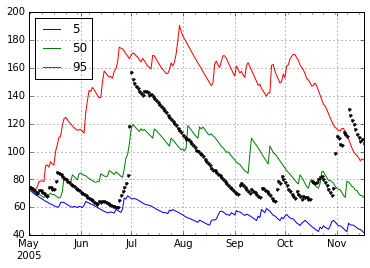

In [36]:
#Plot the percentile agreement forecasts, with actuals

fcp_df.plot()
actuals_df.loc[fcp_df.index]['sm'].plot(color='#000000',style='.')

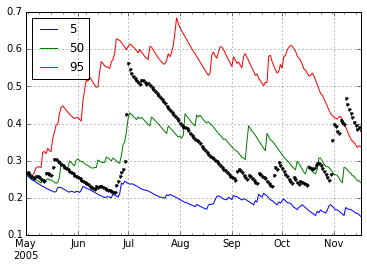

In [45]:
#Plot the percentile agreement forecasts, with actuals
pct_full_fcp = ens_to_percentiles(ens_pct_df,[5,50,95])
pct_full_fcp.plot()
actuals_df.loc[fcp_df.index][VARIABLE+'_pct'].plot(color='#000000',style='.')

In [42]:
ens_monthly = ens_df.resample('m','mean').iloc[:-1] # drop the final month as incomplete;

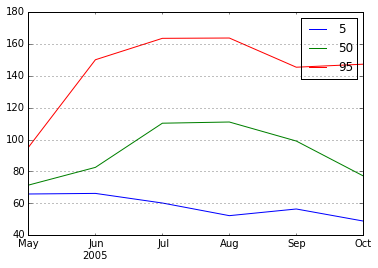

In [43]:
ens_to_percentiles(ens_monthly,[5,50,95]).plot()

In [ ]:
#Differing styles

In [46]:
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [14,6]
from matplotlib import pyplot as plt

In [52]:
df = pct_full_fcp.copy()
df['actual'] = actuals_df[VARIABLE+'_pct'].loc[df.index]

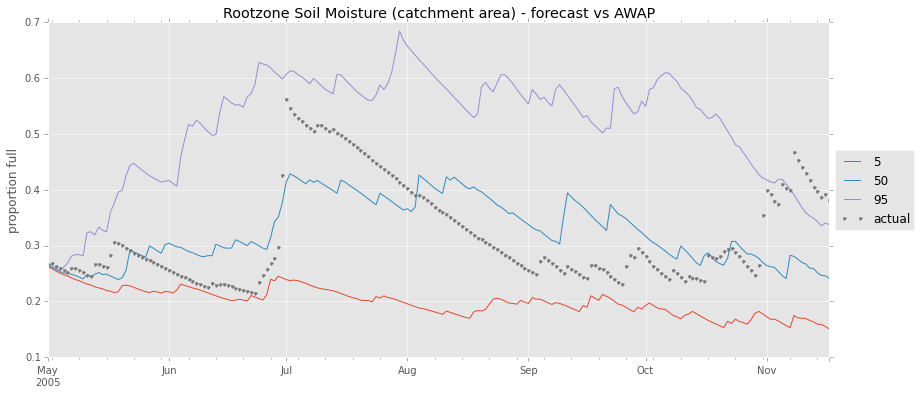

In [54]:
sm_layer_name = 'Rootzone Soil Moisture'
df[[5,50,95,'actual']].plot(style=dict(actual='.')).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('%s (catchment area) - forecast vs AWAP' % sm_layer_name)
plt.ylabel('proportion full')
